### About the Notebook

In this notebook, we will exmplore Udemy class data from Kaggle.com and try to predict which classes are successful using Pandas, matplotlib, seaborn and scikit-learn

In [1]:
#To begin, we will import the following packages:

import pandas as pd #data analysis tool
import numpy as np #machine learning framework
import seaborn as sns #data visualization tool
import matplotlib.pyplot as plt #data visualization tool
# import joypy
# import plotly.express  as px
# import plotly.graph_objects as go

# from matplotlib import cm
# plt.style.use('ggplot')

df = pd.read_csv('data/udemy_courses.csv') #import the csv file

In [2]:
df.info() ##Take a look at the dataset. There are 3682 courses and no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   url                  3682 non-null   object
 3   is_paid              3682 non-null   bool  
 4   price                3682 non-null   object
 5   num_subscribers      3682 non-null   int64 
 6   num_reviews          3682 non-null   int64 
 7   num_lectures         3682 non-null   int64 
 8   level                3682 non-null   object
 9   content_duration     3682 non-null   object
 10  published_timestamp  3682 non-null   object
 11  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(7)
memory usage: 320.1+ KB


In [3]:
# Read data
df = pd.read_csv('data/udemy_courses.csv')

# Print a sample of the data
df.sample(5).reset_index(drop=True).style.set_properties(**{'background-color': '#161717','color': '#30c7e6','border-color': '#8b8c8c'})

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1113008,Building Up To Barre Chords,https://www.udemy.com/building-up-to-barre-chords/,True,20,20,6,12,All Levels,43 mins,2017-03-16T22:57:47Z,Musical Instruments
1,835712,Crash Course - Learn to Create a PHP MVC Framework,https://www.udemy.com/crash-course-learn-to-create-a-php-mvc-framework/,True,50,1282,117,12,All Levels,1 hour,2016-05-01T18:04:29Z,Web Development
2,573064,Photoshop in Ease: Create World Amazing Graphic Designs,https://www.udemy.com/photoshop-knights-become-a-professional-in-no-time/,True,20,14440,182,26,All Levels,3 hours,2015-08-13T21:17:34Z,Graphic Design
3,294794,Create An HTML5 Video Player From Scratch,https://www.udemy.com/html5-video-player/,False,Free,32260,1005,12,Beginner Level,1.5 hours,2014-09-05T19:16:53Z,Web Development
4,652768,Trading: Basics of Trading for Beginners,https://www.udemy.com/money-basics-of-trading-for-beginners/,True,140,1309,4,20,Beginner Level,1.5 hours,2015-11-11T01:30:17Z,Business Finance


In [4]:
# 'published_timestamp' is stored as an object so we will convert it to a date time

df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])

df.info() #Take a look at the updated datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   url                  3682 non-null   object             
 3   is_paid              3682 non-null   bool               
 4   price                3682 non-null   object             
 5   num_subscribers      3682 non-null   int64              
 6   num_reviews          3682 non-null   int64              
 7   num_lectures         3682 non-null   int64              
 8   level                3682 non-null   object             
 9   content_duration     3682 non-null   object             
 10  published_timestamp  3682 non-null   datetime64[ns, UTC]
 11  subject              3682 non-null   object             
dtypes: bool(1), datetime

In [5]:
#To further inspect the data, we can split the content_duration column into unit and value

df['content_time_value'] = df['content_duration'].str.split(' ').str[0]
df['content_time_unit']  = df['content_duration'].str.split(' ').str[1]

# Inspect contentless cases
df.query("content_time_unit == 'questions'")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_time_value,content_time_unit
93,1259560,Test your knowledge in Basics of Accounting,https://www.udemy.com/test-your-knowledge-in-b...,True,30,1000,11,0,Beginner Level,218 questions,2017-06-20 05:56:52+00:00,Business Finance,218,questions
95,1270254,Test your Knowledge in Cost Accounting,https://www.udemy.com/test-your-knowledge-in-c...,True,30,999,3,0,All Levels,18 questions,2017-06-27 10:43:44+00:00,Business Finance,18,questions
847,1271684,Test your Knowledge in Banking Credit Analysis...,https://www.udemy.com/banking-credit-analysis-...,True,30,17,0,0,All Levels,24 questions,2017-06-30 10:45:11+00:00,Business Finance,24,questions
970,1259396,Test your knowledge in Financial Management,https://www.udemy.com/test-your-knowledge-in-f...,True,30,20,0,0,All Levels,82 questions,2017-06-21 05:05:10+00:00,Business Finance,82,questions


In [6]:
# We have some courses that don't have any lectures because they are paid assessments. We'll want to remove them as the duration does not apply to them.

# Remove undesired rows
df = df.drop([93,95,847,970,2066],axis=0).reset_index(drop=True)


In [7]:
#Change content_duration to break content_time_value in minutes into hours

df['content_multiplier'] = np.where(df['content_time_unit'] == 'mins',1/60,1)

In [8]:
#Update content_duration to equal content_time_value * content_multiplier which would equate all time in the column into hours
df['content_duration']   = df['content_time_value'].astype('float') * df['content_multiplier']



In [9]:
#We will apply the function below to the boolean string so that 'TRUE' and 'FALSE' appear as 'True' and 'False'

def fix_paid_columns(x):
    if x == 'TRUE':
        return('True')
    elif x == 'FALSE':
        return('False')
    else:
        return(x)

In [10]:
df['is_paid']    = df['is_paid'].apply(fix_paid_columns) #apply method replaces the string with boolean values
df['engagement'] = df['num_reviews'] / df['num_subscribers']

In [11]:
#Save the new dataset

df.to_csv('data/clean_newdata.csv',index=False)

In [12]:
#Use the new csv file

df = pd.read_csv('data/clean_dataset.csv') 

### Distribution Analysis

array([[<AxesSubplot:title={'center':'course_id'}>,
        <AxesSubplot:title={'center':'num_subscribers'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'num_lectures'}>,
        <AxesSubplot:title={'center':'content_duration'}>,
        <AxesSubplot:title={'center':'content_time_value'}>],
       [<AxesSubplot:title={'center':'content_multiplier'}>,
        <AxesSubplot:title={'center':'engagement'}>, <AxesSubplot:>]],
      dtype=object)

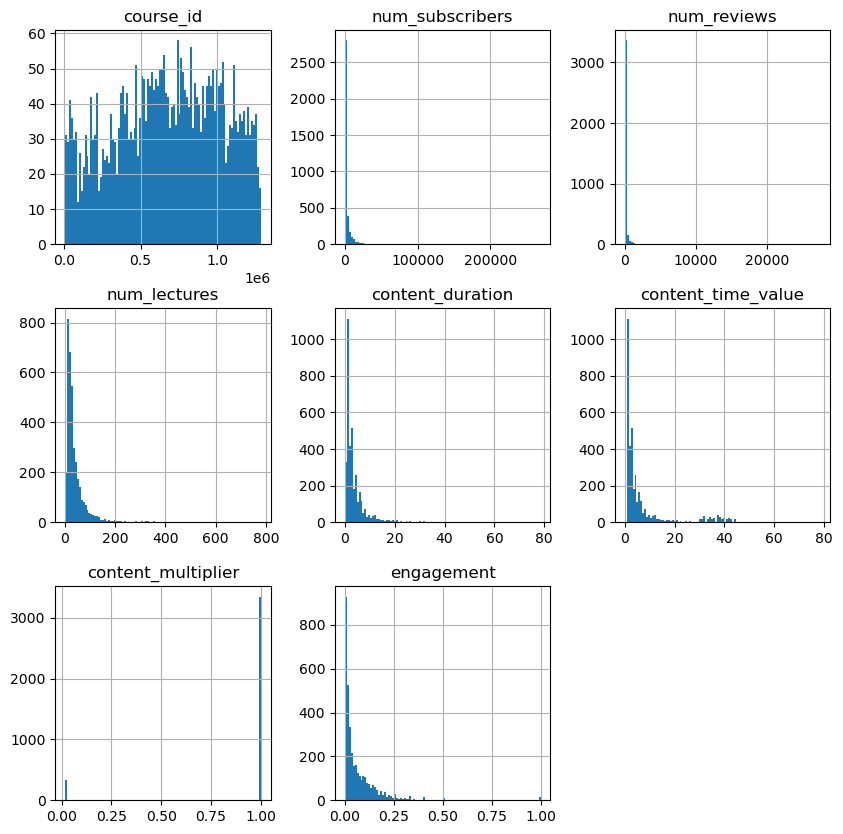

In [13]:
#Separate the numerical and categorical data in order to plot bar charts

num_cols_df = df.select_dtypes(['int64','float64','datetime64[ns, UTC]']) #select datatypes
cat_cols_df = df.select_dtypes(['object']) #selecting the object to populate the charts/chart titles
num_cols_df.hist(figsize = (10,10),bins=100)

### Combining Features

In order to figure out the average length of lecture in hours we can divide 'content_duration' by 'num_lectures'

In [14]:
df['content_duration'] = pd.to_numeric(df['content_duration'], errors='coerce') #update Content Duration to float64 datatype
df['price'] = pd.to_numeric(df['price'], errors='coerce') #update Price to float64 datatype
num_cols_df = df.select_dtypes(include=['int64', 'float64']) #selecting the datatypes
num_cols_df["average_lecture_length"] = num_cols_df["content_duration"]/num_cols_df["num_lectures"]


In [15]:
df.info() #see the updated datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3677 non-null   int64  
 1   course_title         3677 non-null   object 
 2   url                  3677 non-null   object 
 3   is_paid              3677 non-null   bool   
 4   price                3368 non-null   float64
 5   num_subscribers      3677 non-null   int64  
 6   num_reviews          3677 non-null   int64  
 7   num_lectures         3677 non-null   int64  
 8   level                3677 non-null   object 
 9   content_duration     3677 non-null   float64
 10  published_timestamp  3677 non-null   object 
 11  subject              3677 non-null   object 
 12  content_time_value   3677 non-null   float64
 13  content_time_unit    3676 non-null   object 
 14  content_multiplier   3677 non-null   float64
 15  engagement           3607 non-null   f

In [16]:
num_cols_df["revenue"] = num_cols_df["price"]*num_cols_df["num_subscribers"] #price=float64, subscribers=int64. Multiplying the two results in float64

### Building A Machine Model

In [17]:
# We want to predict revenue (price*Number of subscribers) as well as number of subscribers

# Lets prepare the numerical and categorical columns by replacing any null values


fill_mean = lambda col: col.fillna(col.mean())
fill_mode = lambda col: col.fillna(col.mode()[0])
fill_median = lambda col: col.fillna(col.median())

In [18]:
cat_cols_df = cat_cols_df.iloc[:,2:] #iloc[:2] is selecting all rows and columns from the 3rd column onwards
def create_dummy_df(df, cat_cols, dummy_na): #create the new dummy variable
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            #get_dummies() will add additional columns for data that may not be in the trained model
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df #return the dataframe
cat_cols_df = create_dummy_df(cat_cols_df, cat_cols_df.columns, dummy_na = False)

In [19]:
from sklearn.model_selection import train_test_split #using Scikit-learn train_test_split method
X_num_cols_df = num_cols_df[['content_duration','num_lectures','num_reviews','price']] #remove CourseId, Revenue and Number of Subscribers are also removed since that is what we're trying to predict
X = pd.concat([X_num_cols_df,cat_cols_df],axis = 1) #axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns
y = num_cols_df['revenue'] #revenue = price * number of subscribers
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#test_size is given as 0.30 , it means 30% of our data goes into our test size
#train_test_split() used to split data into train and test sets
#The X_train and X_test sets are used to fit and train our model and the test sets are used for testing and validating
#Setting random_state a fixed value (42) will guarantee that same sequence of random numbers are generated each time you run the code

In [20]:
from sklearn.pipeline import make_pipeline #the pipeline with break into 2 steps (Standard Scaler + Linear Regression)
from sklearn.preprocessing import StandardScaler #for preprocessing to prepare the data and make it easier for machine learning model to interpret and work with
from sklearn.linear_model import LinearRegression #import a linear regression model
from sklearn.model_selection import train_test_split



X = X.fillna(X.mean()) #filling any missing X values with the mean
y = y.fillna(y.mean()) #filling any missing y values with the mean

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

# Create a pipeline with a StandardScaler preprocessing step and a LinearRegression model
# The StandardScaler step scales the data to have a mean of 0 and a standard deviation of 1, which helps improve the performance of the LinearRegression model
lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Fit the pipeline to the training data
# The pipeline is then fit to the training data, meaning that the model is trained on the data and is ready to make predictions on new data
lm_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [21]:
# Calculate the mean squared error (MSE) for a linear regression model to measure how close the regression line is to the actual data points

from sklearn.metrics import mean_squared_error
y_test_preds = lm_model.predict(X_test) # calls the 'predict' method of lm_model on 'X_test'
mse_score = mean_squared_error(y_test, y_test_preds) #calculate the MSE between predicted 'y_test-preds' and the true 'y_test'
length_y_test = len(y_test) 
print("The MSE for your model was {} on {} values.".format(mse_score, length_y_test)) #prints the length of 'y_test'

The MSE for your model was 446085340727.3906 on 1104 values.


### Analysis

The mean squared error (MSE) for this linear regression model was 446085340727.3906. This indicates that the model is not performing well on the data, and there is a large difference between the predicted values and the actual values.

The MSE is a measure of how well the model fits the data, and a lower MSE generally indicates a better fit. The fact that there were 1104 values used in the calculation suggests that this was the result of evaluating the model on a test set of 1104 observations.

This model had very poor performance on the test data, suggesting further tuning. One way to do this would be to apply natural language processing (NLP) on the Course Title column to see if there are certain keywords have an effect on the outcome. Another option is to use an exploratory comparison of features by analyzing the relationship between a set of independent variables and a dependent variable through scatter plots, bar charts as well as correlation and regression analysis.